In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

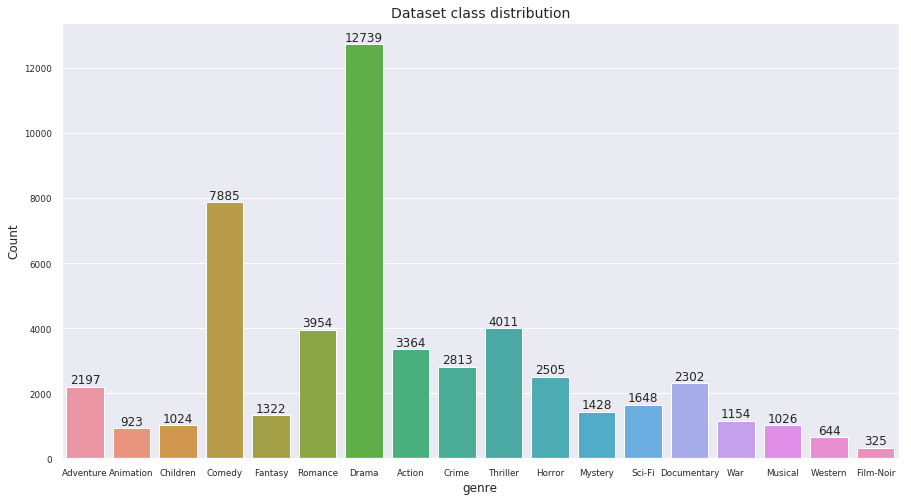

In [20]:
def print_barplot(df):
    categories = df.columns[4:-1]
    sns.set(font_scale = 0.8)
    plt.figure(figsize=(15,8))
    ax= sns.barplot(categories, df.iloc[:,4:-1].sum().values)
    plt.title("Dataset class distribution", fontsize=14)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel('genre', fontsize=12)
    #adding the text labels
    rects = ax.patches
    labels = df.iloc[:,4:-1].sum().values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12)
    plt.show()

df = pd.read_csv('preprocessed_movies.csv')
df.set_index('movieId')
only_genres = df.iloc[:,4:]
df['sum'] = only_genres[only_genres.columns].sum(axis=1)
print_barplot(df)

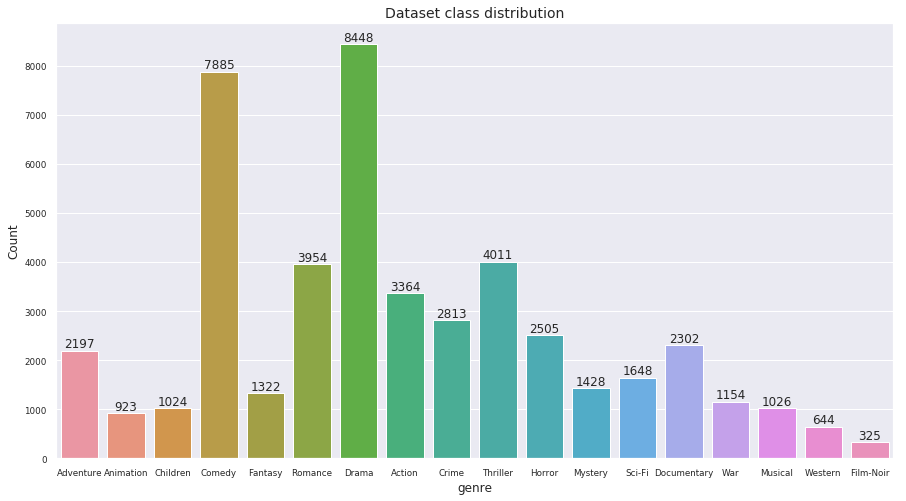

In [21]:
only_genres_index = only_genres[(only_genres['Drama'] == 1) & (df['sum'] == 1)].index
only_drama = df.iloc[only_genres_index]
# Lets drop all only drama rows! (they suck)
df = df.drop(only_drama.index)
print_barplot(df)

1206


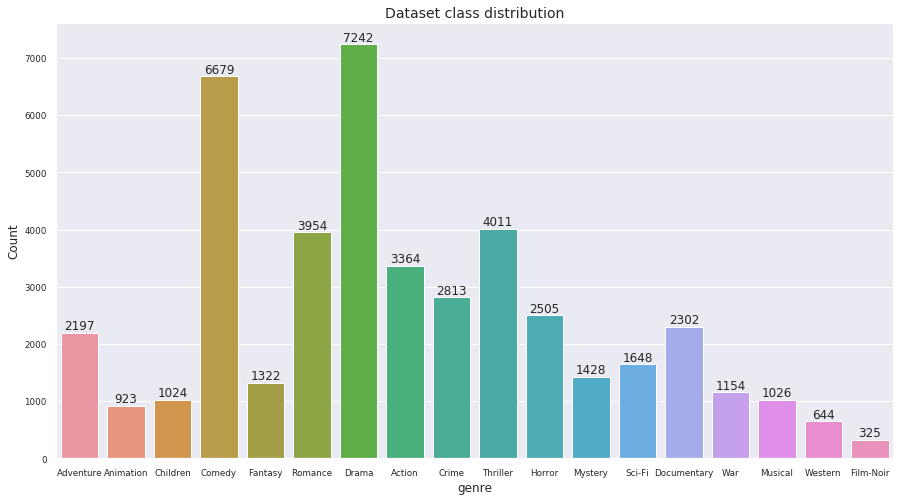

In [22]:
only_genres_index = df[(df['Drama'] == 1) & (df['Comedy'] == 1) & (df['sum'] == 2)].index
print(len(only_genres_index))
# Lets drop all drama+comedy rows! (they suck)
df = df.drop(only_genres_index)
print_barplot(df)

918


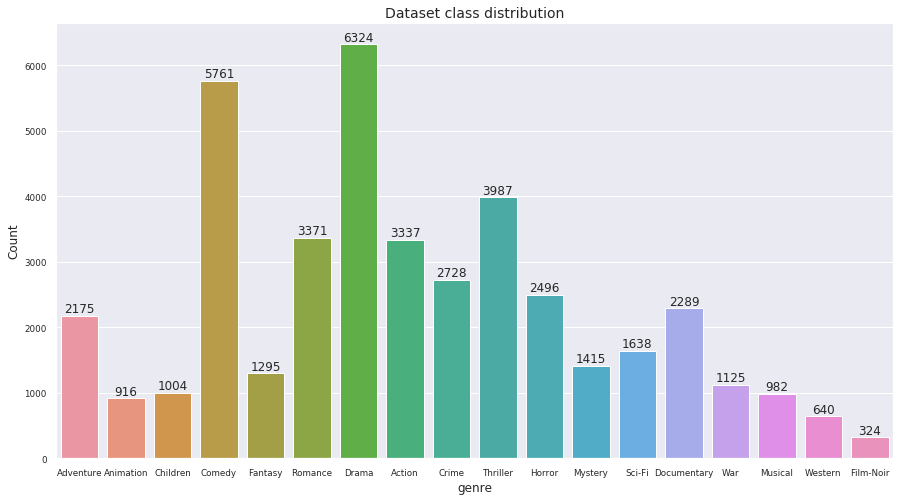

In [23]:
only_genres_index = df[(df['Drama'] == 1) & (df['Comedy'] == 1) & (df['sum'] == 3)].index
print(len(only_genres_index))
# Lets drop all drama+comedy rows! (they suck)
df = df.drop(only_genres_index)
print_barplot(df)

In [24]:
df.drop(['ID','sum'],axis=1, inplace=True)
print(df.columns)
df.to_csv('preprocessed_better_dist.csv')

Index(['youtubeId', 'movieId', 'title', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller',
       'Horror', 'Mystery', 'Sci-Fi', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir'],
      dtype='object')
